In [1]:
import json 
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
from glob import glob 

def load_df(log_dir):
    with open(log_dir, 'r') as f:
        data = f.readlines()
    df = pd.DataFrame(list(pd.Series(data).map(eval).values))    
    return df 

def load_log_data(class_name, version, result_dir,method):

    df = pd.DataFrame()
    for i,v in enumerate(version):
        log_dir = os.path.join(result_dir,class_name,method,v,'log.txt')
        
        temp_df = load_df(log_dir)
        temp_df['hue'] = v 
        
        df = pd.concat([df,temp_df])
    
    return df 

def plot_log(data,class_name, metrics:list, figsize:tuple = (10,7)):
    
    fig, axes = plt.subplots(len(metrics),1,figsize=figsize)
    
    for ax, metric in zip(axes, metrics):
        sns.lineplot(
            x = 'epoch',
            y = metric,
            data = data,
            hue = data['hue'],
            ax = ax 
        )
        
    fig.suptitle(class_name)
    plt.show()

In [ ]:
class_name = 'wood'
method = 'STPM'
version = ['MoreEpoch-anomaly_ratio_0']
result_dir = './results/benchmark/MVTecAD/'
metrics = ['test_pixel_auroc','test_aupro']
df = load_log_data(class_name, version, result_dir,method)

plot_log(df,class_name, metrics)

### STPM Base 

In [13]:
version = ['loss_anomalib-anomaly_ratio_0', 'Baseline-anomaly_ratio_0']
result_dir = './results/benchmark/MVTecAD/'
metrics = ['test_pixel_auroc','test_aupro']
method = 'STPM'


df = pd.DataFrame()
for v in version:
    log_dirs = glob(os.path.join(result_dir,'*',method,v,'results_seed0_best.json'))
    for log_dir in log_dirs:
        temp_df = pd.DataFrame(json.load(open(log_dir)))
        temp_df['class'] = log_dir.split('/')[-4]
        temp_df['normal_ratio'] = float(log_dir.split('/')[-2].split('-')[1].split('_')[-1])
        temp_df['exp'] = log_dir.split('/')[-2]
        df = pd.concat([df,temp_df])    
    
df = df.reset_index()    
df.columns = ['metric','best_step','valid','test','class','normal_ratio','exp']

In [28]:
df['class'].unique()

array(['leather', 'zipper', 'metal_nut', 'wood', 'pill', 'hazelnut',
       'transistor', 'grid', 'tile', 'capsule', 'toothbrush', 'screw',
       'carpet', 'bottle', 'cable'], dtype=object)

In [36]:
df[df['class']=='tile']

,metric,best_step,valid,test,class,normal_ratio,exp
52,loss,97,2.378237,2.395620,tile,0.0,Baseline-anomaly_ratio_0
53,image_auroc,97,NaN,0.923160,tile,0.0,Baseline-anomaly_ratio_0
54,pixel_auroc,97,NaN,0.864149,tile,0.0,Baseline-anomaly_ratio_0
55,aupro,97,NaN,0.694862,tile,0.0,Baseline-anomaly_ratio_0


### PatchCore Base 

In [109]:
version = ['-normal_ratio_0.1-anomaly_ratio_0']
result_dir = './results/benchmark/MVTecAD/'
metrics = ['test_pixel_auroc','test_aupro']
method = 'PatchCore'

log_dirs = glob(os.path.join(result_dir,'*',method,version[0],'results_seed0_best.json'))
df = pd.DataFrame()

for log_dir in log_dirs:
    temp_df = pd.DataFrame(json.load(open(log_dir)))
    temp_df['class'] = log_dir.split('/')[-4]
    df = pd.concat([df,temp_df])    
df = df.reset_index()    
df = df.pivot(index='class', columns='index', values='test')
df.mean().reset_index().T

,0,1,2,3
index,aupro,image_auroc,loss,pixel_auroc
0,0.8898,0.894077,0.0,0.969336


In [111]:
version = ['-normal_ratio_0.25-anomaly_ratio_0']
result_dir = './results/benchmark/MVTecAD/'
metrics = ['test_pixel_auroc','test_aupro']
method = 'PatchCore'

log_dirs = glob(os.path.join(result_dir,'*',method,version[0],'results_seed0_best.json'))
df = pd.DataFrame()

for log_dir in log_dirs:
    temp_df = pd.DataFrame(json.load(open(log_dir)))
    temp_df['class'] = log_dir.split('/')[-4]
    df = pd.concat([df,temp_df])    
df = df.reset_index()    
df = df.pivot(index='class', columns='index', values='test')
df.mean().reset_index().T

,0,1,2,3
index,aupro,image_auroc,loss,pixel_auroc
0,0.915908,0.931516,0.0,0.97727


In [108]:
version = ['-normal_ratio_0.01-anomaly_ratio_0']
result_dir = './results/benchmark/MVTecAD/'
metrics = ['test_pixel_auroc','test_aupro']
method = 'PatchCore'

log_dirs = glob(os.path.join(result_dir,'*',method,version[0],'results_seed0_best.json'))
df = pd.DataFrame()

for log_dir in log_dirs:
    temp_df = pd.DataFrame(json.load(open(log_dir)))
    temp_df['class'] = log_dir.split('/')[-4]
    df = pd.concat([df,temp_df])    
df = df.reset_index()    
df= df.pivot(index='class', columns='index', values='test')
df.mean().reset_index().T

,0,1,2,3
index,aupro,image_auroc,loss,pixel_auroc
0,0.827693,0.844306,0.0,0.946074


0.25

In [133]:
version = ['-normal_ratio_0.01-anomaly_ratio_0','-normal_ratio_0.1-anomaly_ratio_0','-normal_ratio_0.25-anomaly_ratio_0']
result_dir = './results/benchmark/MVTecAD/'
metrics = ['test_pixel_auroc','test_aupro']
method = 'PatchCore'

df = pd.DataFrame()

for v in version:
    log_dirs = glob(os.path.join(result_dir,'*',method,v,'results_seed0_best.json'))
    for log_dir in log_dirs:
        temp_df = pd.DataFrame(json.load(open(log_dir)))
        temp_df['class'] = log_dir.split('/')[-4]
        temp_df['normal_ratio'] = float(log_dir.split('/')[-2].split('-')[1].split('_')[-1])
        df = pd.concat([df,temp_df])    
    
df = df.reset_index()    

In [139]:
pivot_df = df.pivot(index=['class', 'normal_ratio'], columns='index', values='test')
df = pivot_df.reset_index()

<AxesSubplot: xlabel='class', ylabel='aupro'>

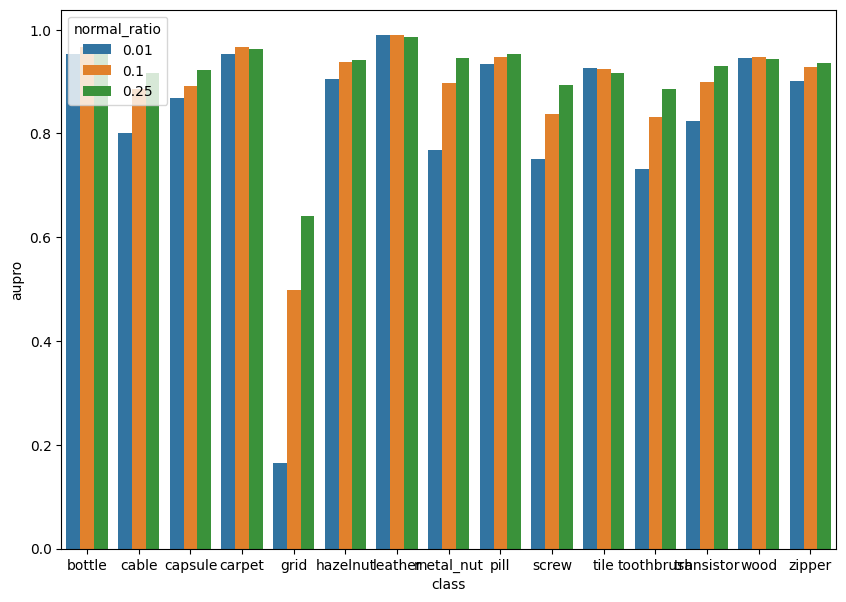

In [151]:
plt.figure(figsize=(10,7))
sns.barplot(
    x = 'class',
    y = 'aupro',
    hue = 'normal_ratio',
    data = df
)